In [11]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [12]:
from keras.datasets import cifar10
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
 y_train.shape

(50000, 1)

In [16]:
y_test.shape

(10000, 1)

[0]


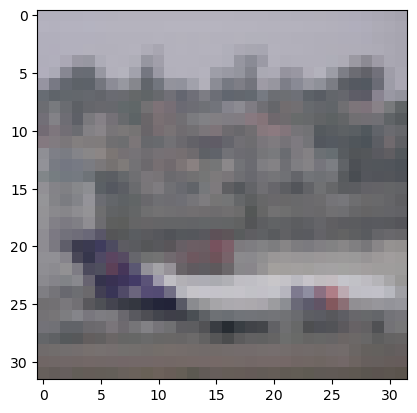

In [17]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\talibul haque\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


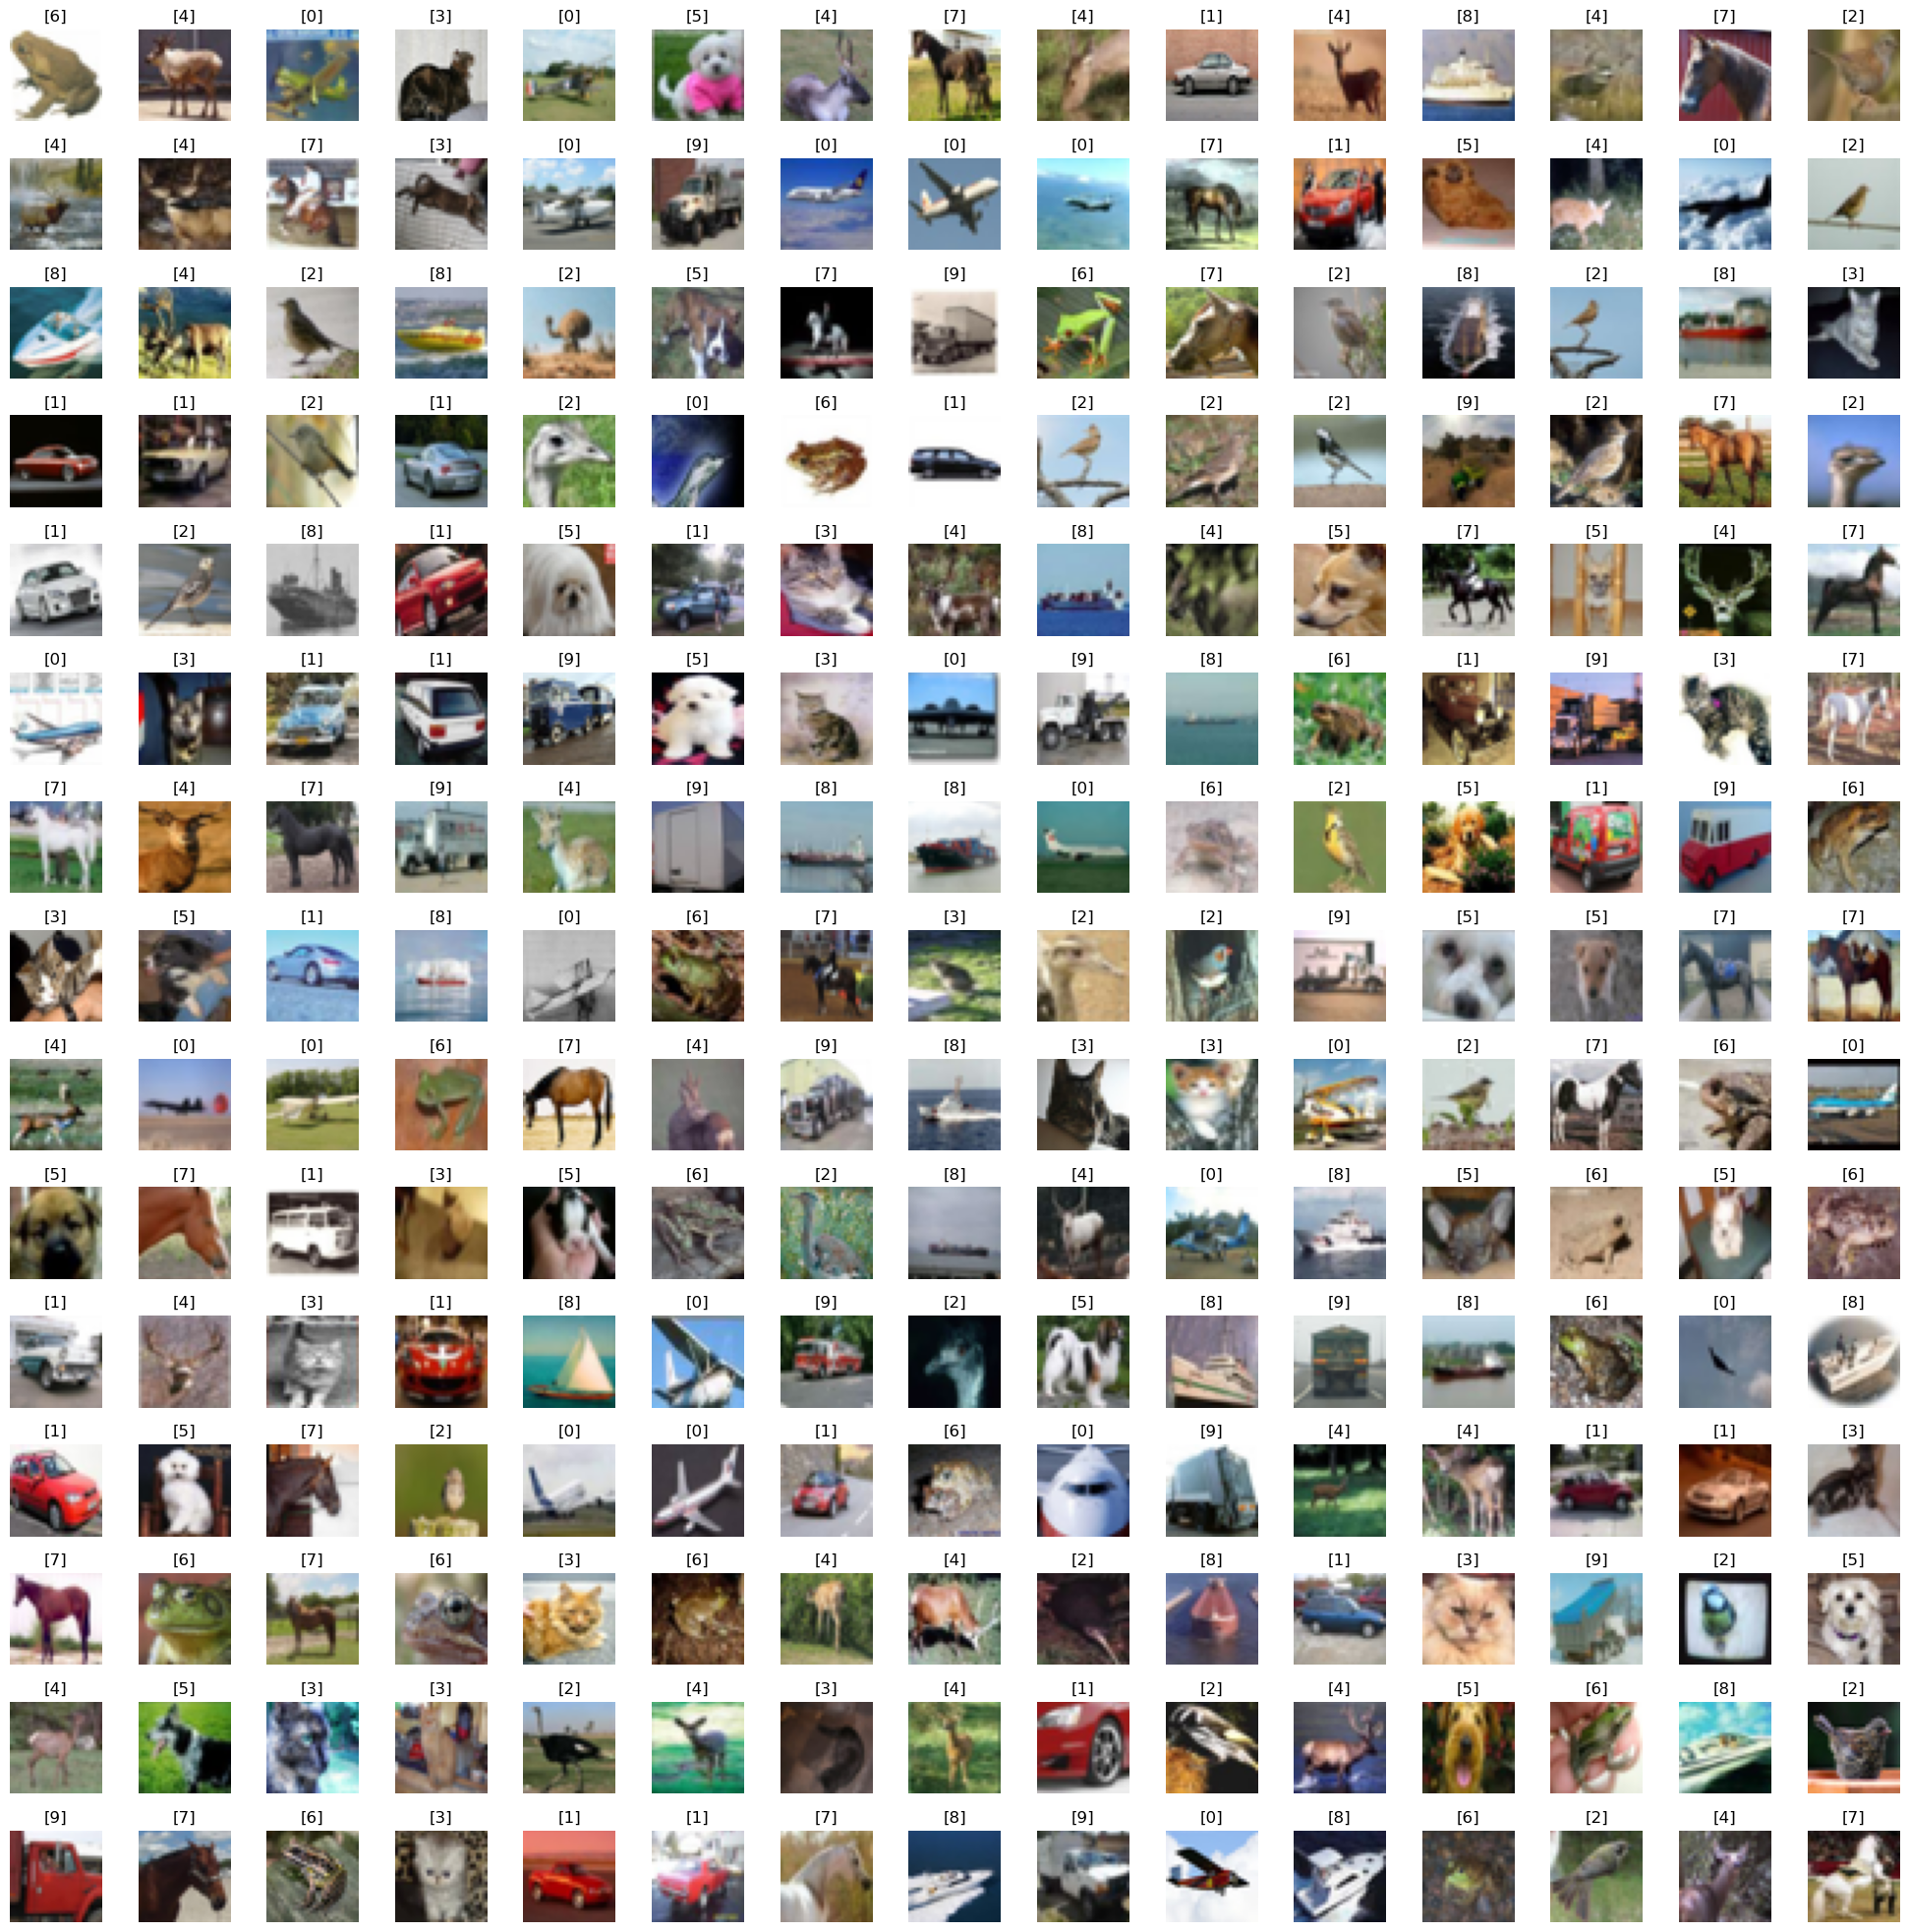

In [18]:
W_grid  = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [19]:
n_training

50000

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
number_cat = 10

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [26]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [27]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
X_train = X_train/255.0
X_test = X_test/255.0

In [29]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
Input_shape = X_train.shape[1:]

In [32]:
Input_shape

(32, 32, 3)

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [34]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10 , activation = 'softmax'))



In [35]:
cnn_model.compile(loss = 'categorical_crossentropy',optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [36]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 25 , shuffle = True)

Epoch 1/25
1563/1563 [==============================] - 95s 60ms/step - loss: 1.5473 - accuracy: 0.4345
Epoch 2/25
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1311 - accuracy: 0.5992
Epoch 3/25
1563/1563 [==============================] - 93s 60ms/step - loss: 0.9543 - accuracy: 0.6637
Epoch 4/25
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8367 - accuracy: 0.7066
Epoch 5/25
1563/1563 [==============================] - 98s 63ms/step - loss: 0.7609 - accuracy: 0.7328
Epoch 6/25
1563/1563 [==============================] - 99s 63ms/step - loss: 0.6958 - accuracy: 0.7566
Epoch 7/25
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6322 - accuracy: 0.7763
Epoch 8/25
1563/1563 [==============================] - 97s 62ms/step - loss: 0.5887 - accuracy: 0.7920
Epoch 9/25
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5454 - accuracy: 0.8065
Epoch 10/25
1563/1563 [==============================] - 96s 62m

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.9546 - accuracy: 0.7559
Test Accuracy: 0.7559000253677368


In [39]:
predict_x = cnn_model.predict(X_test)

classes_x=np.argmax(predict_x,axis=1)
classes_x

313/313 [==============================] - 3s 8ms/step


array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [40]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [41]:
y_test = y_test.argmax(1)

In [42]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

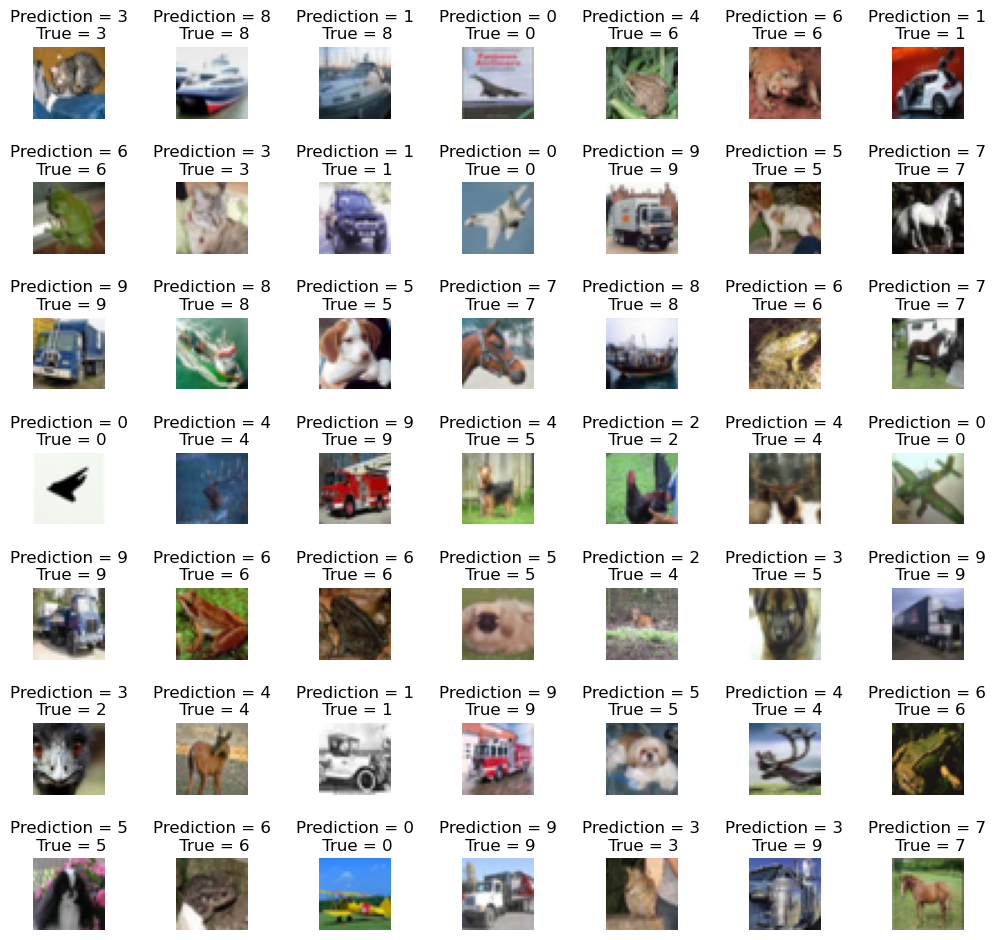

In [43]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)          


<Axes: >

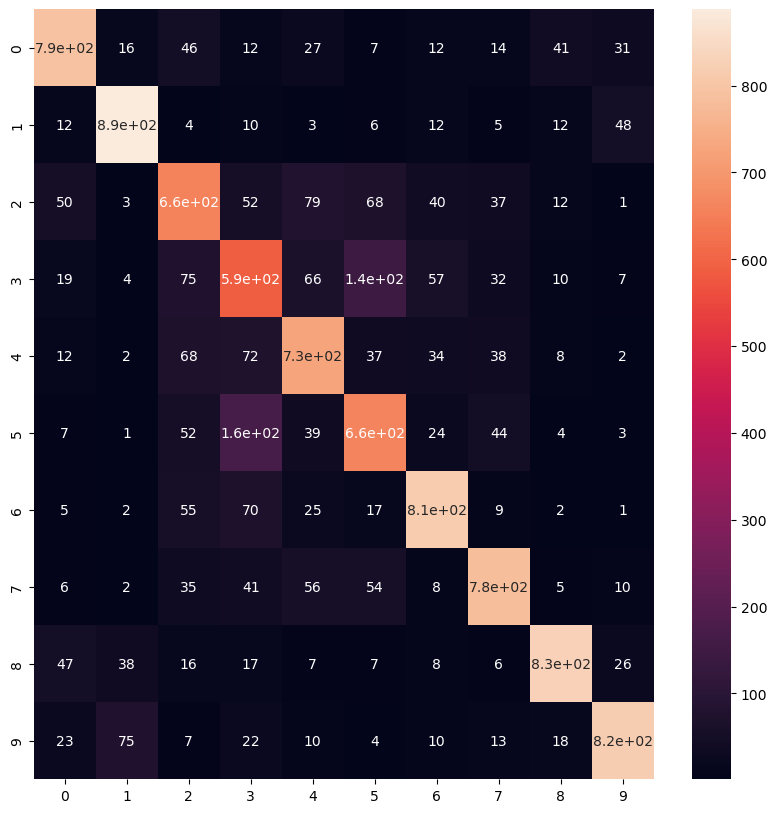

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,classes_x)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

In [45]:
import os
directory = os.path.join(os.getcwd(),'save_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [47]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [48]:
X_train.shape

(50000, 32, 32, 3)

In [49]:
n = 25
X_train_sample = X_train[:n]
from keras.preprocessing.image import ImageDataGenerator
#dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train  =ImageDataGenerator(vertical_flip = True)
#dataget_train = ImageDataGenerator(height_shift_range = 0.5)
dataget_train = ImageDataGenerator(brightness_range = (1,3))
dataget_train.fit(X_train_sample)

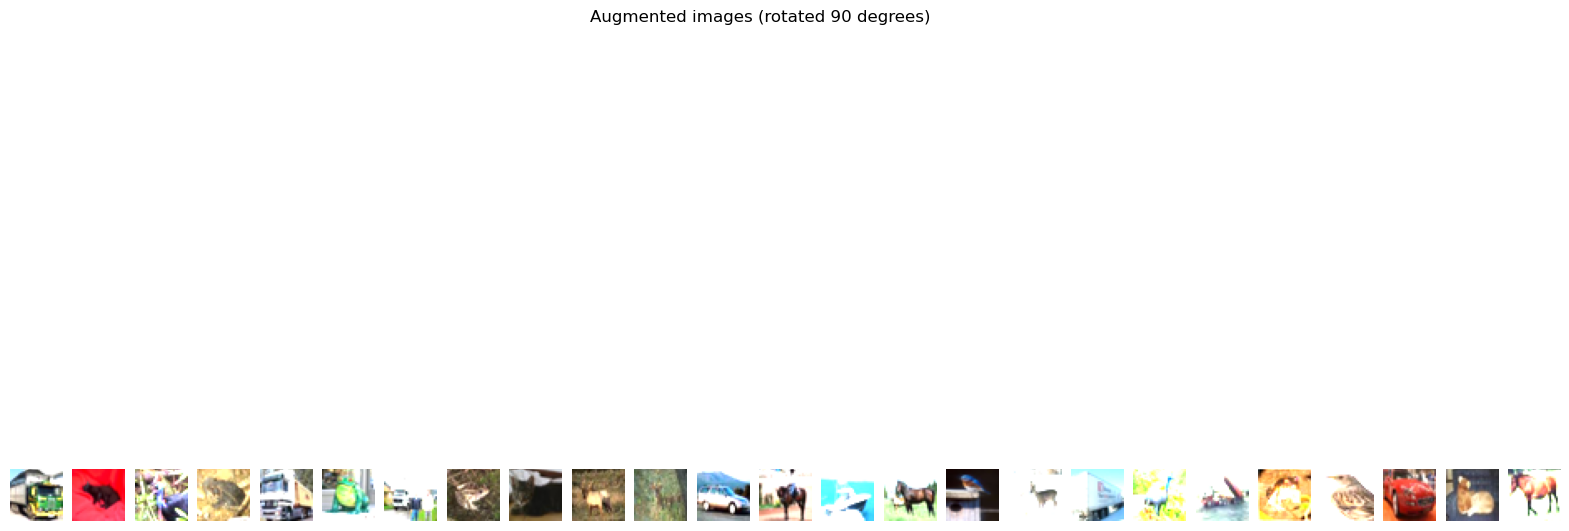

In [50]:
from PIL import Image
import matplotlib .pyplot as plt
fig= plt.figure(figsize = (20,10))

for x_batch in dataget_train.flow(X_train_sample,batch_size = n ):
    for i in range(0,n):
        ax = fig.add_subplot(1,n,i+1)
        pil_image = Image.fromarray((x_batch[i]).astype(np.uint8))
        ax.imshow(pil_image)
        ax.axis('off')
        
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
   
    break;



In [51]:
from keras.preprocessing.image import ImageDataGenerator
datagen =  ImageDataGenerator(
                    rotation_range = 90 ,
                    width_shift_range = 0.1,
                    horizontal_flip = True,
                    vertical_flip = True
)

In [52]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size  = 32), epochs = 2 )

Epoch 1/5


C:\Users\talibul haque\AppData\Local\Temp\ipykernel_11092\944413582.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size  = 32), epochs = 5 )


1563/1563 [==============================] - 91s 58ms/step - loss: nan - accuracy: 0.4176
Epoch 2/5
1563/1563 [==============================] - 89s 57ms/step - loss: nan - accuracy: 1.0000
Epoch 3/5
1563/1563 [==============================] - 89s 57ms/step - loss: nan - accuracy: 1.0000
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: nan - accuracy: 1.0000
Epoch 5/5
1563/1563 [==============================] - 90s 58ms/step - loss: nan - accuracy: 1.0000


In [55]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: ',score[1])

ValueError: in user code:

    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\talibul haque\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [56]:
import os
directory = os.path.join(os.getcwd(),'save_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)